In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
path_to_csv = "kdd.txt"

df = pd.read_csv(path_to_csv, header = None)

# 1. Clean data with Panda

In [3]:
df.rename(columns={0: 'duration', 
                   1: 'protocol_type',
                   2: 'service', 
                   3: 'flag',
                   4: 'src_bytes',
                   5: 'dst_bytes',
                   6: 'land',
                   7: 'wrong_fragment',
                   8: 'urgent',
                   9: 'hot',
                   10: 'num_failed_logins',
                   11: 'logged_in',
                   12: 'num_compromised',
                   13: 'root_shell',
                   14: 'su_attempted',
                   15: 'num_root',
                   16: 'num_file_creations',
                   17: 'num_shells',
                   18: 'num_access_files',
                   19: 'num_outbound_cmds',
                   20: 'is_host_login',
                   21: 'is_guest_login',
                   22: 'count',
                   23: 'srv_count',
                   24: 'serror_rate',
                   25: 'srv_serror_rate',
                   26: 'rerror_rate',
                   27: 'srv_rerror_rate',
                   28: 'same_srv_rate',
                   29: 'diff_srv_rate',
                   30: 'srv_diff_host_rate',
                   31: 'dst_host_count',
                   32: 'dst_host_srv_count',
                   33: 'dst_host_same_srv_rate',
                   34: 'dst_host_diff_srv_rate',
                   35: 'dst_host_same_src_port_rate',
                   36: 'dst_host_srv_diff_host_rate',
                   37: 'dst_host_serror_rate',
                   38: 'dst_host_srv_serror_rate',
                   39: 'dst_host_rerror_rate',
                   40: 'dst_host_srv_rerror_rate',
                   41: 'type'
                  }, inplace=True)

In [4]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
group_by = df.groupby(['type']).size().reset_index(name='counts')

In [6]:
n_groups = df['type'].nunique()

In [7]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

# 2. Visualize data with Matplotlib

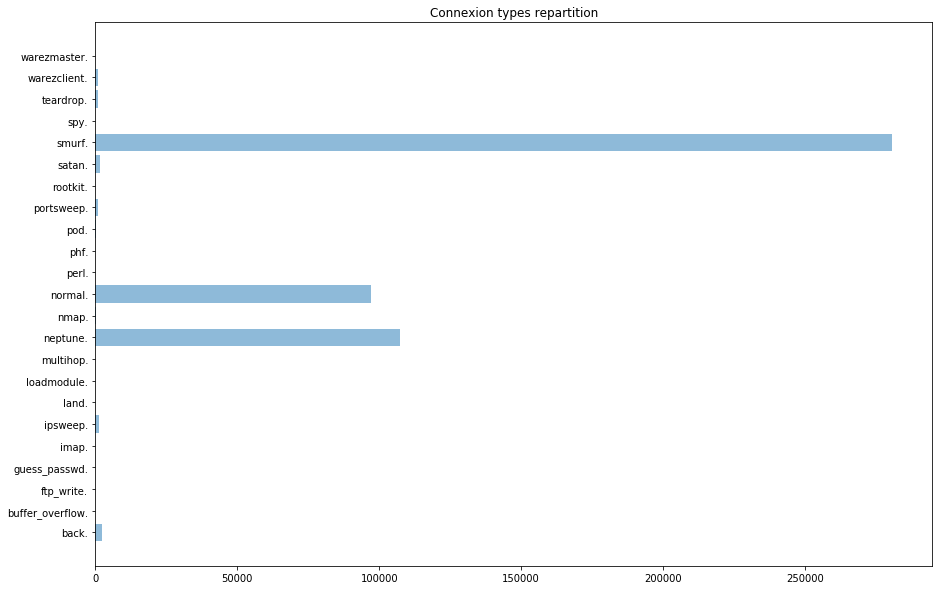

In [8]:
types = group_by['type']
count_by_type = group_by['counts']

y_pos = np.arange(len(types))

plt.figure(figsize=(15,10))
    
plt.barh(y_pos, count_by_type, align='center', alpha=0.5)
plt.yticks(y_pos, types)
plt.title('Connexion types repartition')
 
plt.show()

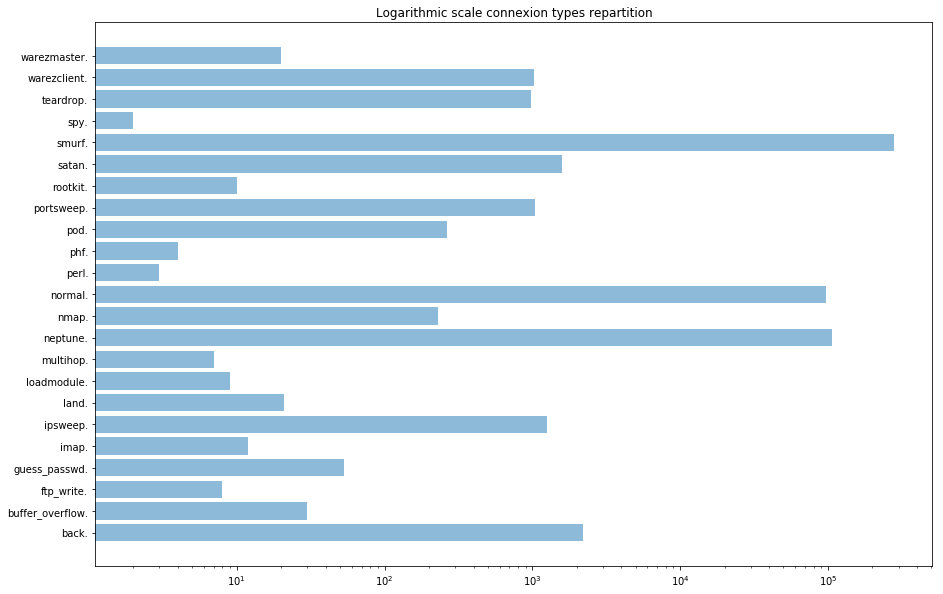

In [9]:
y_pos = np.arange(len(types))

fig, ax = plt.subplots(figsize=(15,10))
plt.barh(y_pos, count_by_type, align='center', alpha=0.5)
ax.set_xscale('log')
plt.yticks(y_pos, types)
plt.title('Logarithmic scale connexion types repartition')
plt.show()

### C) Heatmap

In [10]:
group_by = df.groupby(["type", "hot"]).size().reset_index(name="time")
group_by = group_by.sort_values(by=['type', 'hot'])

types_unique = group_by['type'].unique()
hot_unique = group_by['hot'].unique()

In [11]:
max_size = 0
sizes = np.zeros(types_unique.size)

for i, type_Y in enumerate(types_unique):
    size = 0
    for line in group_by['type']:
        if (line == type_Y):
            size = size + 1
    sizes[i] = size
    if (size > max_size):
        max_size = size

In [12]:
res = np.zeros((types_unique.size,max_size))    
for i_type, type_Y in enumerate(types_unique):
    nb_time = 0
    for i in range(max_size):
        if (i < sizes[i_type]):
            res[i_type][i] = group_by['time'][nb_time]
            nb_time = nb_time + 1
        else:
            res[i_type][i] = 0

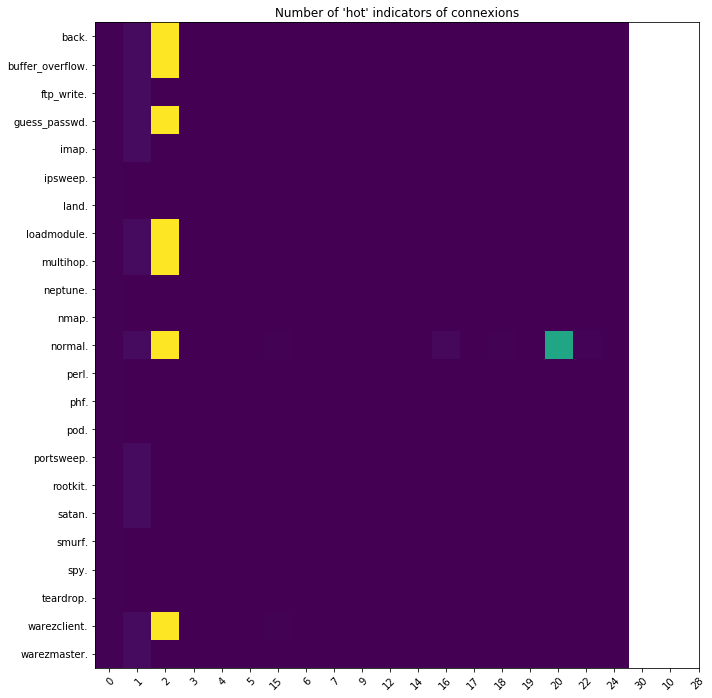

In [13]:
fig, ax = plt.subplots(figsize=(10,15))
im = ax.imshow(res)

ax.set_xticks(np.arange(len(hot_unique)))
ax.set_yticks(np.arange(len(types_unique)))

ax.set_xticklabels(hot_unique)
ax.set_yticklabels(types_unique)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.set_title("Number of 'hot' indicators of connexions")
fig.tight_layout()
plt.show()

# 3. Modelisation

Verification qu'il n'y a aucune valeur null ou na

In [ ]:
NULL = df.isnull().sum()
NA = df.isna().sum()
NA_NULL = pd.DataFrame([NA, NULL]).T
NA_NULL.columns = ["nb_NA", "nb_NULL"]
NA_NULL

Pas de data préparation

In [ ]:
#Ce avec quoi on va predire
X = df.loc[:, df.columns != "type"]
X = X.drop("protocol_type", 1)
X = X.drop("service", 1)
X = X.drop("flag", 1)
X.head()

In [ ]:
#Ce que l'on veut predire
Y = df["type"]
Y.head()

In [ ]:
#Séparation en jeu de test et de train 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [ ]:
#Séparation en jeu de test et de validation 
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size = 0.3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
hyperparametres = {"n_estimators" : 20, 
                  "bootstrap" : False}
#On fait un dictionnaire avec les hypers paramètres

In [ ]:
algo = RandomForestClassifier(**hyperparametres)

In [ ]:
#Entrainement du modèle
modele = algo.fit(X_train, Y_train)

In [ ]:
 modele.score(X_test, Y_test)

In [ ]:
print(modele.feature_importances_)
plt.bar(range(len(modele.feature_importances_)), modele.feature_importances_)
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
algo2 = GaussianNB()

In [ ]:
modele2 = algo2.fit(X_train, Y_train)

In [ ]:
modele2.score(X_test, Y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
algo3 = DecisionTreeClassifier()

In [ ]:
modele3 = algo3.fit(X_train, Y_train)

In [ ]:
modele3.score(X_test, Y_test)

In [ ]:
ques = X_val.values
rep = Y_val.values

In [ ]:
ques

In [ ]:
q = modele.predict(ques)

In [ ]:
modele.score(X_val, Y_val)

# La GridSearch 

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, accuracy_score, recall_score

In [ ]:
clf = RandomForestClassifier(n_jobs = -1)

param_grid = {
    "min_samples_split": [3, 5], #10
    "n_estimators": [40, 50], #56
    "max_depth": [3, 5, 10], #12
    "max_features": [3, 18], #10
    "criterion": ["gini", "entropy"]    
}

scorers = {
    "precision_score": make_scorer(precision_score), 
    "recall_score":make_scorer(recall_score),
    "accuracy_score":make_scorer(accuracy_score)
}

skf = StratifiedKFold(n_splits = 2)

grid_search = GridSearchCV(clf, 
                           param_grid, 
                           scoring = scorers, 
                           refit="precision_score", 
                           cv=skf, 
                           return_train_score=True, 
                           n_jobs=-1)

grid_search.fit(X_train.values, Y_train.values)
y_pred = grid_search.predict(X_test.values)
#print('Best params for {}'.format(refit_score))
print(grid_search.best_params_)

results = pd.DataFrame()
print(results)
print(grid_search.best_score_)

# Courbe ROC

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt
def courbe_ROC(df, algo, y):
    X_ = df.loc[:, df.columns != y]
    Y_ = df[y]
    X_train_, X_test_, Y_train_, Y_test_ = train_test_split(X_, Y_, test_size = 0.3)
    modele = algo.fit(X_train_, Y_train_)
    probs = modele.predict_proba(X_test_)
    preds = probs[:,1]

    y_true = Y_test_
    y_probas = modele.predict_proba(X_test_)
    
    skplt.metrics.plot_roc_curve(y_true, y_probas)
    plt.show()

In [ ]:
df_normal = pd.concat([X, pd.DataFrame(pd.get_dummies(df['type'])['normal.'])], axis = 1)
courbe_ROC(df_normal, algo, 'normal.')

In [ ]:
df_smurf = pd.concat([X, pd.DataFrame(pd.get_dummies(df['type'])['smurf.'])], axis = 1)
courbe_ROC(df_smurf, algo, 'smurf.')

In [ ]:
df_neptune = pd.concat([X, pd.DataFrame(pd.get_dummies(df['type'])['neptune.'])], axis = 1)
courbe_ROC(df_neptune, algo, 'neptune.')

In [ ]:
df_back = pd.concat([X, pd.DataFrame(pd.get_dummies(df['type'])['back.'])], axis = 1)
courbe_ROC(df_back, algo, 'back.')